In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from typing import List
sb.set()

# Exploratory Data Analysis Functions

In [19]:
def get_dataset_raw() -> pd.DataFrame:
    dataset_folder_path: str = "../../dataset"
    dataset_name: str = "Course_info.csv"
    csv_data: pd.DataFrame = pd.read_csv(f"{dataset_folder_path}/{dataset_name}")

    # Assign the features to the correct datatype
    csv_data['id'] = csv_data['id'].astype(int)
    csv_data['num_subscribers'] = csv_data['num_subscribers'].astype(int)
    csv_data['num_reviews'] = csv_data['num_reviews'].astype(int)
    csv_data['num_comments'] = csv_data['num_comments'].astype(int)
    csv_data['num_lectures'] = csv_data['num_lectures'].astype(int)
    csv_data['content_length_min'] = csv_data['content_length_min'].astype(int)
    csv_data['published_time'] = pd.to_datetime(csv_data['published_time'])
    csv_data['last_update_date'] = pd.to_datetime(csv_data['last_update_date'])
    csv_data['category'] = csv_data['category'].astype('category')
    csv_data['subcategory'] = csv_data['subcategory'].astype('category')
    csv_data['language'] = csv_data['language'].astype('category')
    
    return csv_data

In [20]:
def clean_up_dataset(dataframe: pd.DataFrame) -> pd.DataFrame:
    total_rows = dataframe.shape[0]
    print(f"Total samples: {total_rows}")

    # total_duplicated_ids = dataframe[dataframe.duplicated('id', keep=False)]
    # print(f"Course with duplicated ids: {len(total_duplicated_ids)}")
    #add condition if there is duplicates

    # display the null values for each column
    print(dataframe.isnull().sum())
    
    # for column in dataframe.columns:
    #     print(f"{column}: {type(column)} -> {dataframe[column].dtype}, {dataframe[column].isnull().sum()}")

    #     if dataframe[column].isnull().sum() == 0:
    #         continue
        
    #     if pd.api.types.is_datetime64_dtype(dataframe[column]):
    #         print(f"is_datetime64")
    #         dataframe[column].fillna(value="NoUpdates")
    
    return dataframe

In [21]:
def generate_numerical_eda_visualization(
        dataframe: pd.DataFrame,
        catergorical_column: List[str],
        plot_title: str
    ):
    
    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    numerical_dataframe = numerical_dataframe.drop(columns=catergorical_column)

    total_features = len(numerical_dataframe.columns)
    figure, axes = plt.subplots(
        total_features, 
        3, 
        figsize=(24,4.8*total_features)
    )
    count = 0
    
    # figure.suptitle(plot_title, fontsize=10)
    axes[0, 1].set_title(plot_title)

    for column in numerical_dataframe.columns:
        sb.boxplot(data=numerical_dataframe[column], orient='h', ax=axes[count,0])
        sb.histplot(data=numerical_dataframe[column], ax=axes[count,1])
        sb.violinplot(data=numerical_dataframe[column], orient='h', ax=axes[count,2])
        count = count + 1

In [22]:
def get_outlier_samples(dataframe: pd.DataFrame) -> pd.core.series.Series:

    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    interquartile_range = q3-q1

    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers: pd.core.series.Series = ((dataframe < lower_whisker) | (dataframe > upper_whisker))

    return outliers

In [23]:
def print_feature_outliers(
        dataframe: pd.DataFrame, 
        catergorical_column: List[str]
    ):

    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    numerical_dataframe = numerical_dataframe.drop(columns=catergorical_column)

    for column in numerical_dataframe.columns:

        outliers = sum(get_outlier_samples(numerical_dataframe[column]))
        print(f"[{column}] total outliers: {outliers}")

In [24]:
def remove_outliers(
        dataframe: pd.DataFrame, 
        catergorical_column: List[str]
    ) -> pd.DataFrame:

    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    numerical_dataframe = numerical_dataframe.drop(columns=catergorical_column)

    union_outliers = (get_outlier_samples(numerical_dataframe)).any(axis=1)
    # print(f"Total 'UNION' outliers: {sum(union_outliers)}")
    dataframe_with_outliers_removed: pd.DataFrame = dataframe[~union_outliers].reset_index(drop=True)
    return dataframe_with_outliers_removed

# Exploratory Data Analysis
- Objective: Perform EDA on dataset while ensure that all function is working fine
- Motivation of Analysis: The type course catergory will impact the number of subscribers, price and average rating 

In [25]:
DatasetRaw = get_dataset_raw()
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  209734 non-null  int64              
 1   title               209734 non-null  object             
 2   is_paid             209734 non-null  bool               
 3   price               209734 non-null  float64            
 4   headline            209707 non-null  object             
 5   num_subscribers     209734 non-null  int64              
 6   avg_rating          209734 non-null  float64            
 7   num_reviews         209734 non-null  int64              
 8   num_comments        209734 non-null  int64              
 9   num_lectures        209734 non-null  int64              
 10  content_length_min  209734 non-null  int64              
 11  published_time      209734 non-null  datetime64[ns, UTC]
 12  last_update_date

In [26]:
# removing 
# 'id' cause doesn't have any significant importance to EDA
# 'instructor_name' cause there is NULL value
# 'published_time' cause its time series
# 'last_update_date' cause there is null value and not so simeple to do EDA
# 'num_reviews' cause doesnt seem to have any impact given we have average rating
# 'num_comments' cause doesnt seem to have any impact given we have average rating
# 'subcategory' have yet to decide if there is any need due to large number of types 
# 'language' have yet to decide if this matter at the time of doing this EDA 
ExtractedDataset = pd.DataFrame(
    DatasetRaw[[
        'price', 
        'avg_rating', 
        'num_subscribers',
        'last_update_date',
        'published_time'
    ]]
)

In [27]:
CleanDataset = clean_up_dataset(ExtractedDataset)
#CleanDataset['published_time'] = pd.to_datetime(CleanDataset['published_time']).dt.date


Total samples: 209734
price                 0
avg_rating            0
num_subscribers       0
last_update_date    137
published_time        0
dtype: int64


In [28]:
categorical_data_in_numeric = ['avg_rating']
print_feature_outliers(CleanDataset, categorical_data_in_numeric)
RemovedOutlierDataset = remove_outliers(CleanDataset, categorical_data_in_numeric)
RemovedOutlierDataset

[price] total outliers: 11404
[num_subscribers] total outliers: 31288


,price,avg_rating,num_subscribers,last_update_date,published_time
0,24.99,3.75,2231,2020-11-06,2010-08-05 22:06:13+00:00
1,19.99,4.40,1713,2019-10-09,2010-10-13 18:07:17+00:00
2,159.99,4.75,1266,NaT,2011-06-23 18:31:20+00:00
3,39.99,3.85,3309,2019-03-07,2010-04-14 16:32:46+00:00
4,99.99,4.65,483,2020-02-28,2012-07-03 17:03:28+00:00
...,...,...,...,...,...
167942,19.99,0.00,3,2022-10-06,2022-10-05 11:31:36+00:00
167943,49.99,0.00,0,2022-10-05,2022-10-05 12:29:23+00:00
167944,49.99,0.00,0,2022-10-05,2022-10-05 11:04:05+00:00
167945,119.99,0.00,0,2022-10-05,2022-10-05 10:30:19+00:00


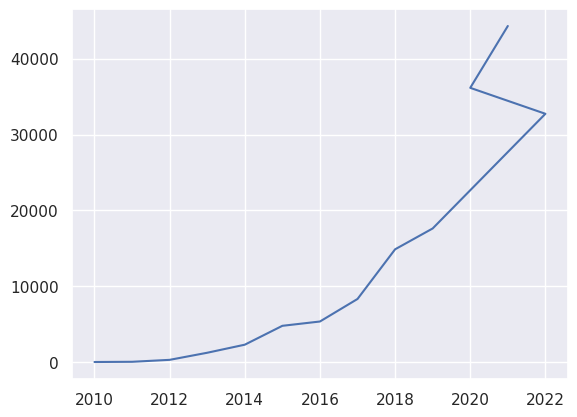

In [29]:
#publish year count
all = RemovedOutlierDataset.published_time.dt.year.value_counts()
year = all.index
count = all.values
plt.plot(year,count)

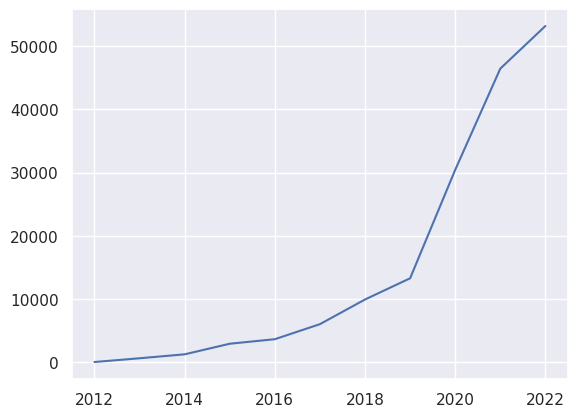

In [30]:
#lastupdate year count
all = RemovedOutlierDataset.last_update_date.dt.year.value_counts()
year = all.index
count = all.values
plt.plot(year,count)

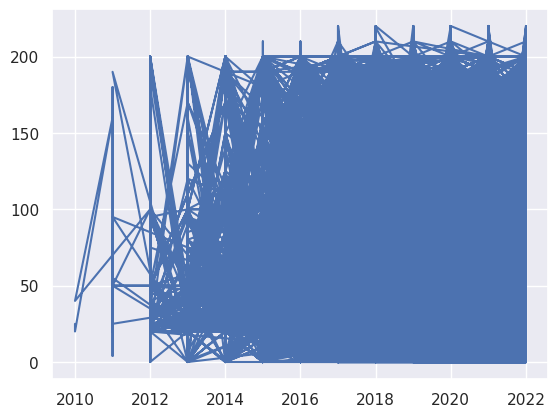

In [31]:
#publish year price
all = RemovedOutlierDataset.published_time.dt.year.value_counts()
year = RemovedOutlierDataset.published_time.dt.year
price = RemovedOutlierDataset.price
plt.plot(year,price)

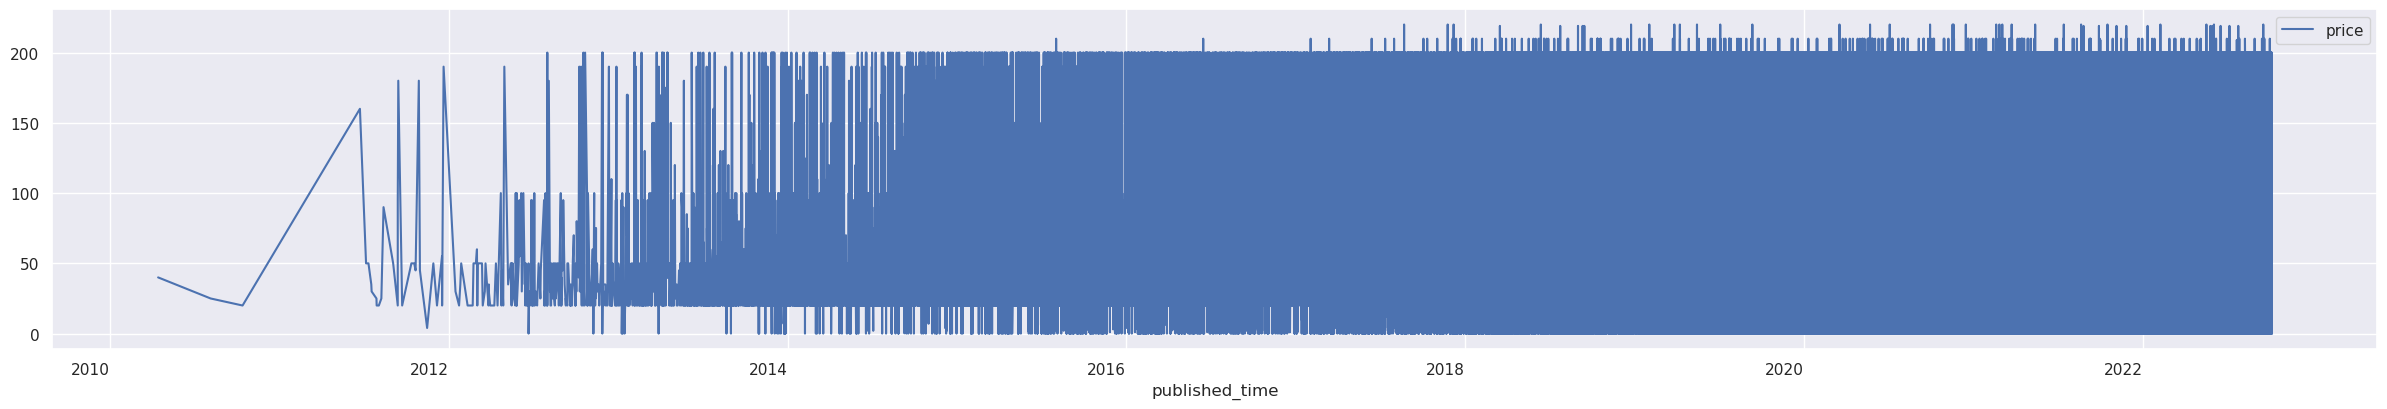

In [32]:
year = RemovedOutlierDataset.published_time.dt.year
price = RemovedOutlierDataset.price
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,5))
RemovedOutlierDataset.plot.line(x="published_time", y="price", color="b", ax=axes, rot=0)
plt.show()

## Want to do Time Series Forecasting to predict subscriber or price (still work in progress)

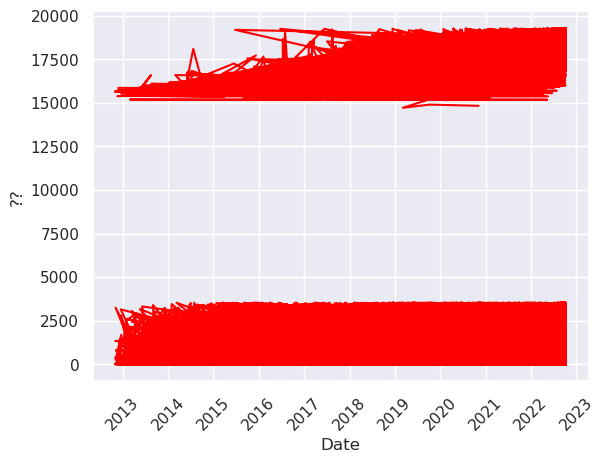

In [33]:
df = RemovedOutlierDataset.copy()
df.index = pd.to_datetime(df['last_update_date'], format='%Y-%m-%d')

train = df[df.index < pd.to_datetime("2000-01-01", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2000-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('??')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

In [34]:
# ------------

In [35]:
df = pd.DataFrame(RemovedOutlierDataset[['price','last_update_date']])
df['last_update_date'] = pd.to_datetime(df['last_update_date'])
df.set_index('last_update_date', inplace= True)
df.head(5)

,price
last_update_date,
2020-11-06,24.99
2019-10-09,19.99
NaT,159.99
2019-03-07,39.99
2020-02-28,99.99


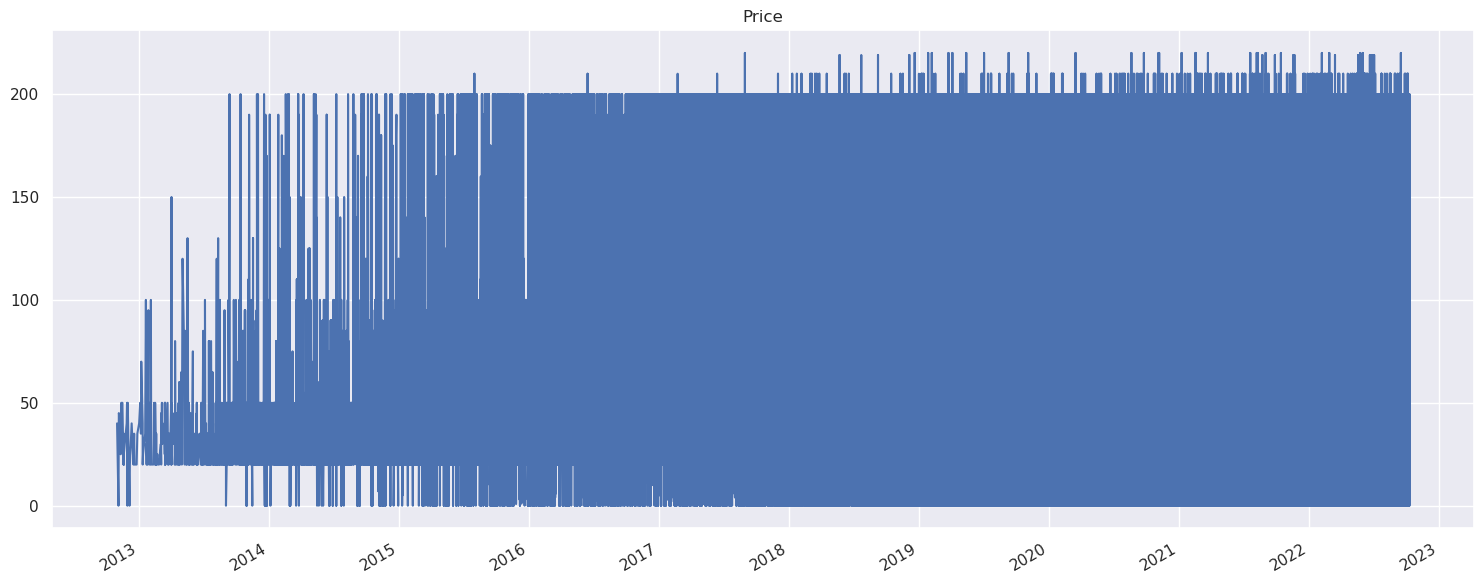

In [36]:
plt.figure(figsize=(15, 6))
df['price'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Price")
plt.tight_layout()
plt.show()

In [37]:
n_cols = 1
dataset = df["price"]
dataset = pd.DataFrame(dataset)
data = dataset.values


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [38]:
# 25% to Train , 75% to Test
train_size = int(len(data) * 0.25)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 41986 Test Size : 125961


In [39]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(41986, 1)

In [40]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 100
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.11359607],
       [0.09086777],
       [0.72726033],
       [0.18178099],
       [0.45452066],
       [0.2272376 ],
       [0.2272376 ],
       [0.2272376 ],
       [0.13632438],
       [0.09086777],
       [0.11359607],
       [0.15905268],
       [0.09086777],
       [0.40906405],
       [0.11359607],
       [0.2045093 ],
       [0.43179235],
       [0.09086777],
       [0.2272376 ],
       [0.81817355],
       [0.2272376 ],
       [0.09086777],
       [0.09086777],
       [0.2045093 ],
       [0.09086777],
       [0.2272376 ],
       [0.81817355],
       [0.2272376 ],
       [0.2272376 ],
       [0.09086777],
       [0.2045093 ],
       [0.09086777],
       [0.01818264],
       [0.09086777],
       [0.09086777],
       [0.2272376 ],
       [0.24996591],
       [0.09086777],
       [0.86363017],
       [0.27269421],
       [0.2272376 ],
       [0.13632438],
       [0.09086777],
       [0.15905268],
       [0.90908678],
       [0.09086777],
       [0.13632438],
  

In [41]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape

((41886, 100, 1), (41886, 1))